# Assessing feature performance

DWPC = 0.4, computed on a [subset](http://doi.org/10.15363/thinklab.d115#1) of non-indications

In [1]:
import re

import matplotlib.pyplot
import pandas
import mpld3
import mpld3.plugins
import seaborn

%matplotlib inline

In [3]:
auc_df = pandas.read_table('data/auc.tsv')
# Add metapath length
auc_df['length'] = auc_df.metapath.map(lambda x: len(re.split(r'[a-z<>]+', x)) - 1)
auc_df.head(2)

,metapath,nonzero,auroc,auprc,length
0,CcSEcCiD,0.590,0.897,0.798,3
1,CiDiCiD,0.255,0.840,0.814,3


## Performance by path length

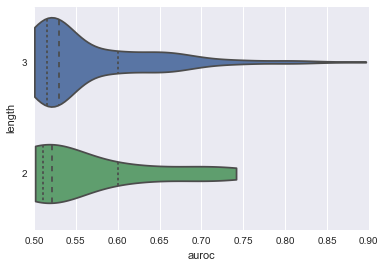

In [4]:
ax = seaborn.violinplot(x='auroc', y='length', data=auc_df, cut=0, orient='h', inner='quartile')

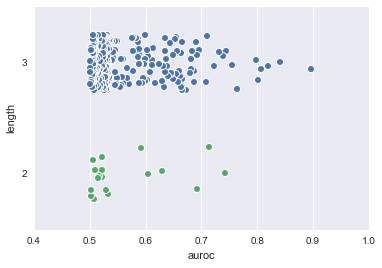

In [5]:
ax = seaborn.stripplot(x='auroc', y='length', data=auc_df, jitter=0.25, orient='h')

## Feature AUROC versus non-zero fraction

In [6]:
grid = seaborn.jointplot('nonzero', 'auroc', data=auc_df, joint_kws={'alpha': 0.5})
points = grid.ax_joint.collections[0]
labels = auc_df.metapath.tolist()
tooltip = mpld3.plugins.PointLabelTooltip(points, labels)
mpld3.plugins.connect(grid.fig, tooltip)
mpld3.display()

## Feature AUPRC versus AUROC

In [7]:
grid = seaborn.jointplot('auroc', 'auprc', data=auc_df, joint_kws={'alpha': 0.5})
points = grid.ax_joint.collections[0]
labels = auc_df.apply(lambda x: '{}: {:.1f}% nonzero'.format(x['metapath'], x['nonzero']*100), axis=1).tolist()
tooltip = mpld3.plugins.PointLabelTooltip(points, labels)
mpld3.plugins.connect(grid.fig, tooltip)
mpld3.display()